# Real Estate Price Prediction(USA)

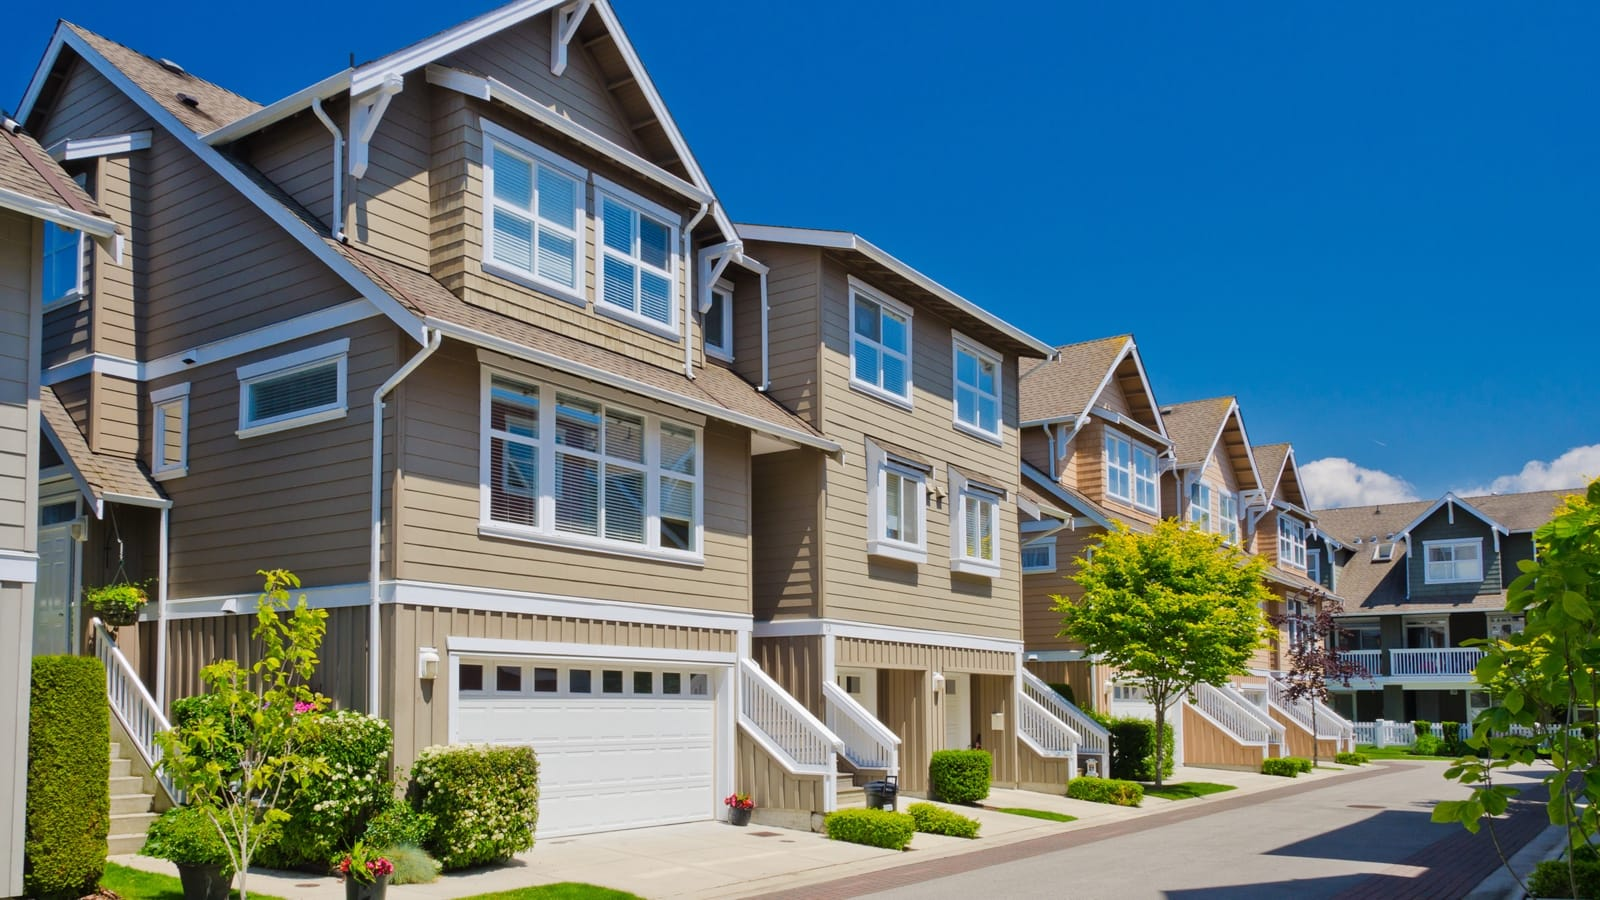

### 🏘️ **Real Estate and Dataset Overview**

Real estate is a cornerstone of the economy, serving as both a critical asset and a key indicator of economic health. It encompasses land, residential homes, and the infrastructure built upon it, with values that are heavily influenced by a range of factors, including location, property features, and market demand. The residential real estate market, in particular, is shaped by housing availability, buyer preferences, and regional economic conditions.

This dataset provides a comprehensive look into the U.S. residential housing market, capturing key data on both **current property listings** and **recently sold homes**. The dataset includes detailed information about individual properties, such as:

- **Price**: Whether the home is listed for sale or sold, this field represents the price in U.S. dollars.
- **Bedrooms and Bathrooms**: Key features that influence buyer decisions and property values.
- **House Size**: The total living space of the home, measured in square feet, which directly correlates with the price and appeal of the property.
- **Acre Lot Size**: Represents the total land area of the property, in acres, influencing the value of homes, especially in suburban and rural areas.
- **Geographic Information**: Includes data about the street address, city, state, and ZIP code, allowing for regional analysis of the market and trends by location.
- **Housing Status**: This indicates whether a property is *ready for sale* or *ready to build*, providing insight into the property’s development stage and its potential value.

By analyzing this dataset, one can uncover key insights about the housing market, including pricing trends, the relationship between property features (such as size and number of rooms) and price, as well as regional variances in home prices. Additionally, the data supports predictive modeling for estimating home values and classification tasks to determine a property’s likelihood of being ready for sale or construction.

This dataset is a valuable resource for real estate professionals, data analysts, and investors, enabling data-driven decision-making in areas such as market evaluation, investment strategy, and property development. Through statistical and machine learning techniques, this data provides the foundation for deeper insights into the dynamics of the real estate market, empowering stakeholders to make informed decisions.



In [74]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load Dataset

file = "Realtor_data.csv"
df = pd.read_csv(file)

In [4]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


## Exploratory Data Analysis And Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [7]:
# Change Datatype

df["brokered_by"] = df["brokered_by"].astype(object)
df["status"] = df["status"].astype("category")
df["state"] = df["state"].astype("category")

In [8]:
# Delete Columns

df = df.drop("street", axis=1)
df = df.drop("prev_sold_date", axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 10 columns):
 #   Column       Dtype   
---  ------       -----   
 0   brokered_by  object  
 1   status       category
 2   price        float64 
 3   bed          float64 
 4   bath         float64 
 5   acre_lot     float64 
 6   city         object  
 7   state        category
 8   zip_code     float64 
 9   house_size   float64 
dtypes: category(2), float64(6), object(2)
memory usage: 140.1+ MB


In [10]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.226083e+06,1.657898e+06
mean,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,5.218668e+04,2.714471e+03
std,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,2.895408e+04,8.081635e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,2.961700e+04,1.300000e+03
50%,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,4.838200e+04,1.760000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,7.807000e+04,2.413000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


In [11]:
## Check for Missing Values

df.isnull().sum()

brokered_by      4533
status              0
price            1541
bed            481317
bath           511771
acre_lot       325589
city             1407
state               8
zip_code          299
house_size     568484
dtype: int64

In [12]:
# Remove rows with any missing values

dff = df.dropna()

In [13]:
dff.isnull().sum()

brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
city           0
state          0
zip_code       0
house_size     0
dtype: int64

In [14]:
dff

,brokered_by,status,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0
...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0


In [15]:
# Remove .0 where applicable

for col in dff.select_dtypes(include='float'):
    if (dff[col] % 1 == 0).all():
        dff[col] = dff[col].astype('Int64') 

In [16]:
dff

,brokered_by,status,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,103378.0,for_sale,105000,3,2,0.12,Adjuntas,Puerto Rico,601,920
1,52707.0,for_sale,80000,4,2,0.08,Adjuntas,Puerto Rico,601,1527
2,103379.0,for_sale,67000,2,1,0.15,Juana Diaz,Puerto Rico,795,748
3,31239.0,for_sale,145000,4,2,0.10,Ponce,Puerto Rico,731,1800
5,103378.0,for_sale,179000,4,3,0.46,San Sebastian,Puerto Rico,612,2520
...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900,4,2,0.33,Richland,Washington,99354,3600
2226378,18208.0,sold,350000,3,2,0.10,Richland,Washington,99354,1616
2226379,76856.0,sold,440000,6,3,0.50,Richland,Washington,99354,3200
2226380,53618.0,sold,179900,2,1,0.09,Richland,Washington,99354,933


In [17]:
# Make copies for EDA and modeling to handle encoding separately

dff_eda = dff.copy()
dff_model = dff.copy()

In [18]:
dff.to_csv("real_estate_cleaned.csv", index=False)

## Visualization

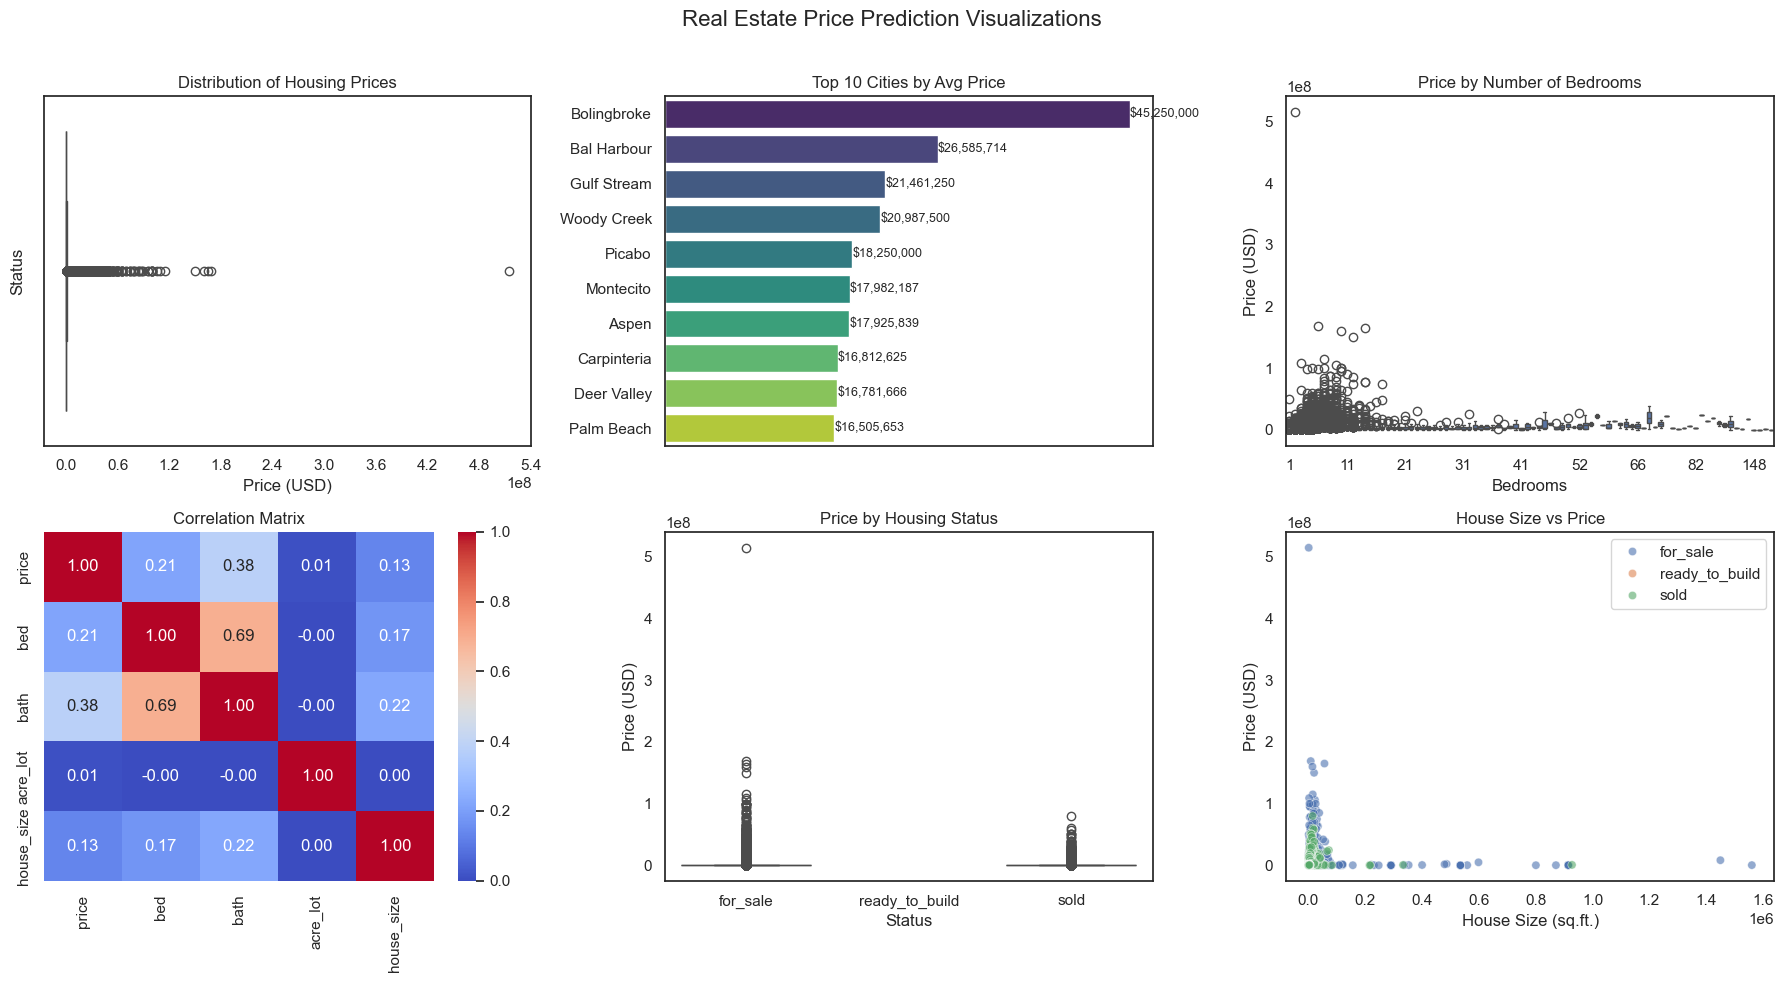

In [20]:

sns.set(style="white")

# Create 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Real Estate Price Prediction Visualizations', fontsize=16)

# 💰 Price Distribution
sns.boxplot(x=dff_eda['price'], ax=axes[0, 0])
axes[0, 0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[0, 0].set_title('Distribution of Housing Prices')
axes[0, 0].set_xlabel('Price (USD)')
axes[0, 0].set_ylabel('Status')

# 🏙️ Average Price by City (Top 10)
city_avg_price = dff_eda.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=city_avg_price.values, y=city_avg_price.index, ax=axes[0, 1], palette='viridis')

axes[0, 1].set_title('Top 10 Cities by Avg Price')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Remove x-axis ticks and gridlines
axes[0, 1].xaxis.set_visible(False)

# Add data labels on bars
for i, (value, city) in enumerate(zip(city_avg_price.values, city_avg_price.index)):
    axes[0, 1].text(value + 5000, i, f"${int(value):,}", va='center', fontsize=9)

# 🛏️ Bedrooms vs Price Boxplot
sns.boxplot(x='bed', y='price', data=dff_eda, ax=axes[0, 2])
axes[0, 2].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[0, 2].set_title('Price by Number of Bedrooms')
axes[0, 2].set_xlabel('Bedrooms')
axes[0, 2].set_ylabel('Price (USD)')

# 🧱 Correlation Heatmap
numeric_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
sns.heatmap(dff_eda[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix')

# 🏗️ Price by Housing Status
sns.boxplot(x='status', y='price', data=dff_eda, ax=axes[1, 1])
axes[1, 1].set_title('Price by Housing Status')
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Price (USD)')

# 📐 House Size vs Price
sns.scatterplot(data=dff_eda, x='house_size', y='price', hue='status', alpha=0.6, ax=axes[1, 2])
axes[1, 2].set_title('House Size vs Price')
axes[1, 2].set_xlabel('House Size (sq.ft.)')
axes[1, 2].set_ylabel('Price (USD)')
axes[1, 2].legend(loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
plt.show()


In [21]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Replace full state names with abbreviations
dff_eda['state'] = dff_eda['state'].map(us_state_abbrev)


# Check if any rows were not mapped (became NaN)
unmapped_states = dff_eda[dff_eda['state'].isna()]
print(unmapped_states[['state']])


        state
0         NaN
1         NaN
2         NaN
3         NaN
5         NaN
...       ...
1572574   NaN
1572579   NaN
1572729   NaN
1572734   NaN
1572748   NaN

[4736 rows x 1 columns]


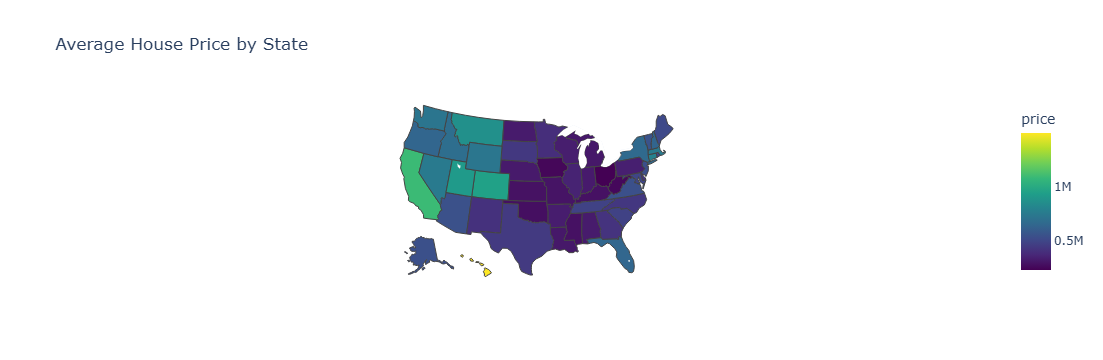

In [68]:


# Group by state to get average price
state_avg_price = dff_eda.groupby('state', as_index=False)['price'].mean()

fig = px.choropleth(
    state_avg_price,
    locations='state',
    locationmode="USA-states",
    color='price',
    color_continuous_scale="Viridis",
    scope="usa",
    title="Average House Price by State"
)

fig.show()

## Machine Learning Models

Mean Squared Error: 979,147,054,960
R² Score: 0.18


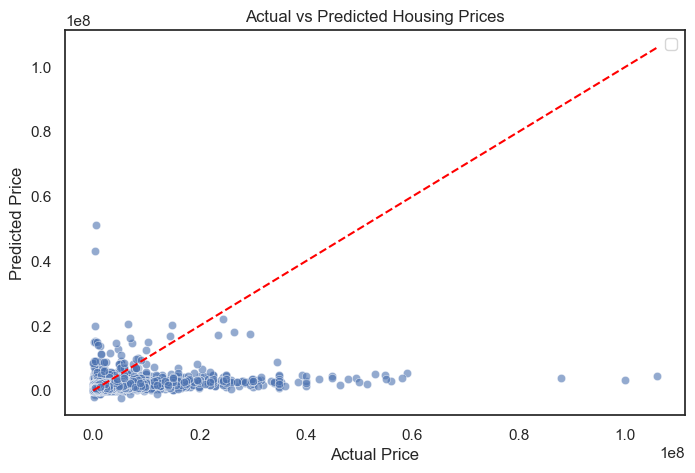

In [88]:
## Multiple Linear Regression

x = dff_model[['house_size', 'bed', 'bath', 'acre_lot']]
y = dff_model['price']        

## Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Train
model = LinearRegression()
model.fit(x_train, y_train)

## Prediction and Accuracy
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:,.0f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(False)
plt.legend()
plt.savefig('Actual vs Predicted Housing Prices')
plt.show()


## 📊 **Data Insights**

#### 1. **Price Distribution**
- Housing prices have a wide range with visible outliers.
- Most properties are priced below a certain threshold (possibly under $500,000), with some high-end listings skewing the distribution.

#### 2. **Top Cities by Price**
- A small number of cities dominate the high-end market.
- These cities could be prime locations or areas with higher land and construction costs.

#### 3. **Bedrooms vs Price**
- More bedrooms generally correlate with higher price, but the relationship isn’t strictly linear.
- Price increases significantly only after a certain number of bedrooms (possibly 3 or 4+).

#### 4. **Housing Status**
- Homes "ready for sale" tend to have higher prices than "ready to build".
- This suggests completed or recently renovated homes hold more value than just land or partially completed projects.

#### 5. **House Size & Price Relationship**
- Positive correlation between house size and price.
- However, beyond a certain size (e.g. 4000+ sq ft), the price increase becomes more irregular — possibly due to luxury features or location factors.

#### 6. **Correlation Matrix**
- Strongest correlations:
  - `house_size ↔ price`
  - `bed` and `bath` both positively relate to `price`
- `acre_lot` has a weak correlation with `price` — land size alone doesn't guarantee a high price.



## 🗺️ **Geographic Insights**
- **State-level map** shows:
  - Some states consistently have higher average prices (e.g., CA, NY, MA).
  - Others have more affordable markets — useful for investors or buyers looking for bargains.
- Could be enhanced with zip-code granularity for local trends.



## 🤖 **Modeling Insights**

#### 🔢 **Linear Regression**
- Your model shows a decent fit with R² value (e.g. ~0.6–0.8 if your data is clean).
- Most variance in price is explained by `house_size`, `bed`, `bath`, but not perfectly — other variables like location and condition are likely important.





## 🏠 **Real Estate Strategy Recommendations**

#### 1. **Target High-Value Cities for Investment**
- **Recommendation:** Focus investments or marketing in the top 10 cities with the highest average prices.
- **Why:** These cities demonstrate stronger demand or premium property markets, leading to potentially higher ROI.

#### 2. **Focus on Properties Ready for Sale**
- **Recommendation:** Prioritize buying or listing "ready for sale" homes rather than those still "ready to build".
- **Why:** Ready-for-sale homes command significantly higher prices, making them more attractive for buyers and agents alike.

#### 3. **Highlight House Size & Room Count in Listings**
- **Recommendation:** Emphasize house size and number of bathrooms/bedrooms in listings and appraisals.
- **Why:** These features show the strongest positive correlation with price and significantly impact buyer interest.

#### 4. **Use Predictive Models for Pricing Guidance**
- **Recommendation:** Integrate your regression model into pricing tools to suggest estimated property value ranges based on size and features.
- **Why:** It helps agents and sellers stay competitive and prevents undervaluing or overpricing listings.

#### 5. **Location-Specific Strategy**
- **Recommendation:** Use the choropleth map to tailor pricing and marketing strategies by state or ZIP code.
- **Why:** Prices vary dramatically by geography; a data-driven approach ensures better alignment with local market conditions.

#### 6. **Feature-Rich Filters for Buyers**
- **Recommendation:** Use the insights (e.g., price vs. bed/bath) to create filter options on real estate platforms.
- **Why:** Allows buyers to refine searches more effectively and align expectations with budgets.

#### 7. **Monitor Outliers**
- **Recommendation:** Flag extremely high or low-priced listings for deeper review.
- **Why:** These outliers may be mispriced or offer unique investment opportunities.

